hello 

In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
dfB = pd.read_csv("Data-Table 1.csv",thousands=',')
dfW = pd.read_csv("london_weather.csv",parse_dates=["date"])

In [31]:
print(dfB.shape)
print(dfW.shape)

(4538, 18)


In [53]:
print(dfB.columns)
print(dfW.columns)

Index(['Number of Bicycle Hires'], dtype='object')
Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')


In [33]:
print(dfB.info())
print(dfW.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4538 entries, 0 to 4537
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Day                        4538 non-null   object 
 1   Number of Bicycle Hires    4538 non-null   int64  
 2   Unnamed: 2                 0 non-null      float64
 3   Month                      150 non-null    object 
 4   Number of Bicycle Hires.1  150 non-null    float64
 5   Unnamed: 5                 0 non-null      float64
 6   Year                       142 non-null    object 
 7   Number of Bicycle Hires.2  149 non-null    object 
 8   Unnamed: 8                 0 non-null      float64
 9   Month.1                    150 non-null    object 
 10  Average Hire Time (mins)   150 non-null    float64
 11  Unnamed: 11                0 non-null      float64
 12  Unnamed: 12                1 non-null      object 
 13  Unnamed: 13                1 non-null      objec

In [34]:
print(dfB.describe())
print(dfW.describe())

       Number of Bicycle Hires  Unnamed: 2  Number of Bicycle Hires.1  \
count              4538.000000         0.0               1.500000e+02   
mean              26753.463861         NaN               7.565836e+05   
std                9870.859958         NaN               2.955487e+05   
min                   0.000000         NaN               0.000000e+00   
25%               19686.500000         NaN               5.870165e+05   
50%               26529.500000         NaN               7.492045e+05   
75%               33987.250000         NaN               9.976160e+05   
max               73094.000000         NaN               1.253102e+06   

       Unnamed: 5  Unnamed: 8  Average Hire Time (mins)  Unnamed: 11  \
count         0.0         0.0                150.000000          0.0   
mean          NaN         NaN                 19.346667          NaN   
std           NaN         NaN                  3.485322          NaN   
min           NaN         NaN                 14.00000

In [ ]:
features = ["cloud_cover", "sunshine" "global_radiation", "max_temp", "mean_temp", "min_temp", "precipitation", "pressure", "snow_depth "]

In [35]:
dfB = dfB.drop(columns = ['Unnamed: 2','Month','Number of Bicycle Hires.1', 'Unnamed: 5', 'Year',
       'Number of Bicycle Hires.2', 'Unnamed: 8', 'Month.1',
       'Average Hire Time (mins)', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'])


In [36]:
dfB = dfB.convert_dtypes()
dfB["Day"] = pd.to_datetime(dfB["Day"])
dfW = dfW.convert_dtypes()
dfW["date"] = pd.to_datetime(dfW["date"])


In [37]:
print(dfW['date'][0])
print(dfW['date'][-1:])
print(dfB['Day'][0])
print(dfB['Day'][-1:])

dfW = dfW[~(dfW['date'] < '2010-07-30')]
dfB = dfB[~(dfB['Day'] > '2020-12-31')]

1979-01-01 00:00:00
15340   2020-12-31
Name: date, dtype: datetime64[ns]
2010-07-30 00:00:00
4537   2022-12-31
Name: Day, dtype: datetime64[ns]


In [38]:
dfB = dfB.set_index("Day")
dfW = dfW.set_index("date")

In [39]:
dfW.info()
dfB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808 entries, 2010-07-30 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       3805 non-null   Int64  
 1   sunshine          3808 non-null   Float64
 2   global_radiation  3802 non-null   Int64  
 3   max_temp          3802 non-null   Float64
 4   mean_temp         3801 non-null   Float64
 5   min_temp          3806 non-null   Float64
 6   precipitation     3802 non-null   Float64
 7   pressure          3808 non-null   Int64  
 8   snow_depth        3171 non-null   Int64  
dtypes: Float64(5), Int64(4)
memory usage: 331.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808 entries, 2010-07-30 to 2020-12-31
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Number of Bicycle Hires  3808 non-null   Int64
dtypes: Int64(1)
memory usa

<Axes: xlabel='date', ylabel='snow_depth'>

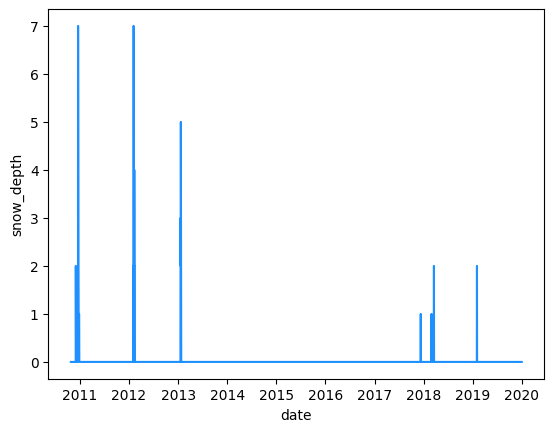

In [40]:
sns.lineplot(x=dfW.index, y=dfW["snow_depth"],  color='dodgerblue')

<Axes: xlabel='date', ylabel='precipitation'>

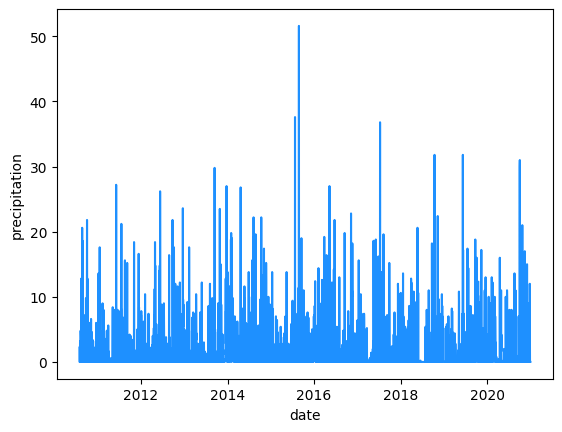

In [41]:
sns.lineplot(x=dfW.index, y=dfW["precipitation"],  color='dodgerblue')

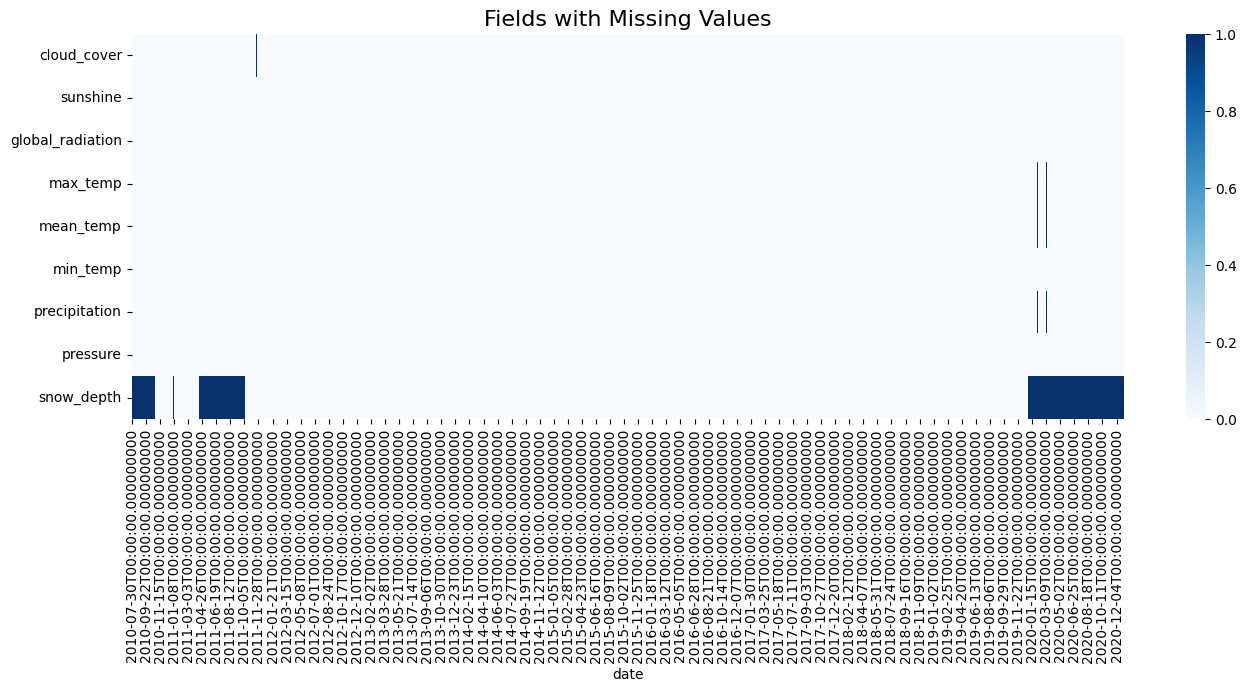

In [42]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(dfW.isna().transpose(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
plt.show()

In [43]:
dfW.isna().sum()


cloud_cover           3
sunshine              0
global_radiation      6
max_temp              6
mean_temp             7
min_temp              2
precipitation         6
pressure              0
snow_depth          637
dtype: int64

In [44]:
dfW["cloud_cover"] = dfW["cloud_cover"].values.astype(float)
dfW["global_radiation"] = dfW["global_radiation"].values.astype(float)
dfW["max_temp"] = dfW["max_temp"].values.astype(float)
dfW["mean_temp"] = dfW["mean_temp"].values.astype(float)
dfW["min_temp"] = dfW["min_temp"].values.astype(float)
dfW["precipitation"] = dfW["precipitation"].values.astype(float)
dfW["snow_depth"] = dfW["snow_depth"].values.astype(float)


dfW.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808 entries, 2010-07-30 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       3805 non-null   float64
 1   sunshine          3808 non-null   Float64
 2   global_radiation  3802 non-null   float64
 3   max_temp          3802 non-null   float64
 4   mean_temp         3801 non-null   float64
 5   min_temp          3806 non-null   float64
 6   precipitation     3802 non-null   float64
 7   pressure          3808 non-null   Int64  
 8   snow_depth        3171 non-null   float64
dtypes: Float64(1), Int64(1), float64(7)
memory usage: 434.0 KB


In [45]:
dfW['cloud_cover'] = dfW['cloud_cover'].interpolate()
dfW['global_radiation'] = dfW['global_radiation'].interpolate()
dfW['max_temp'] = dfW['max_temp'].interpolate()
dfW['mean_temp'] = dfW['mean_temp'].interpolate()
dfW['min_temp'] = dfW['min_temp'].interpolate()
dfW['precipitation'] = dfW['precipitation'].interpolate()
dfW['snow_depth'] = dfW['snow_depth'].interpolate()


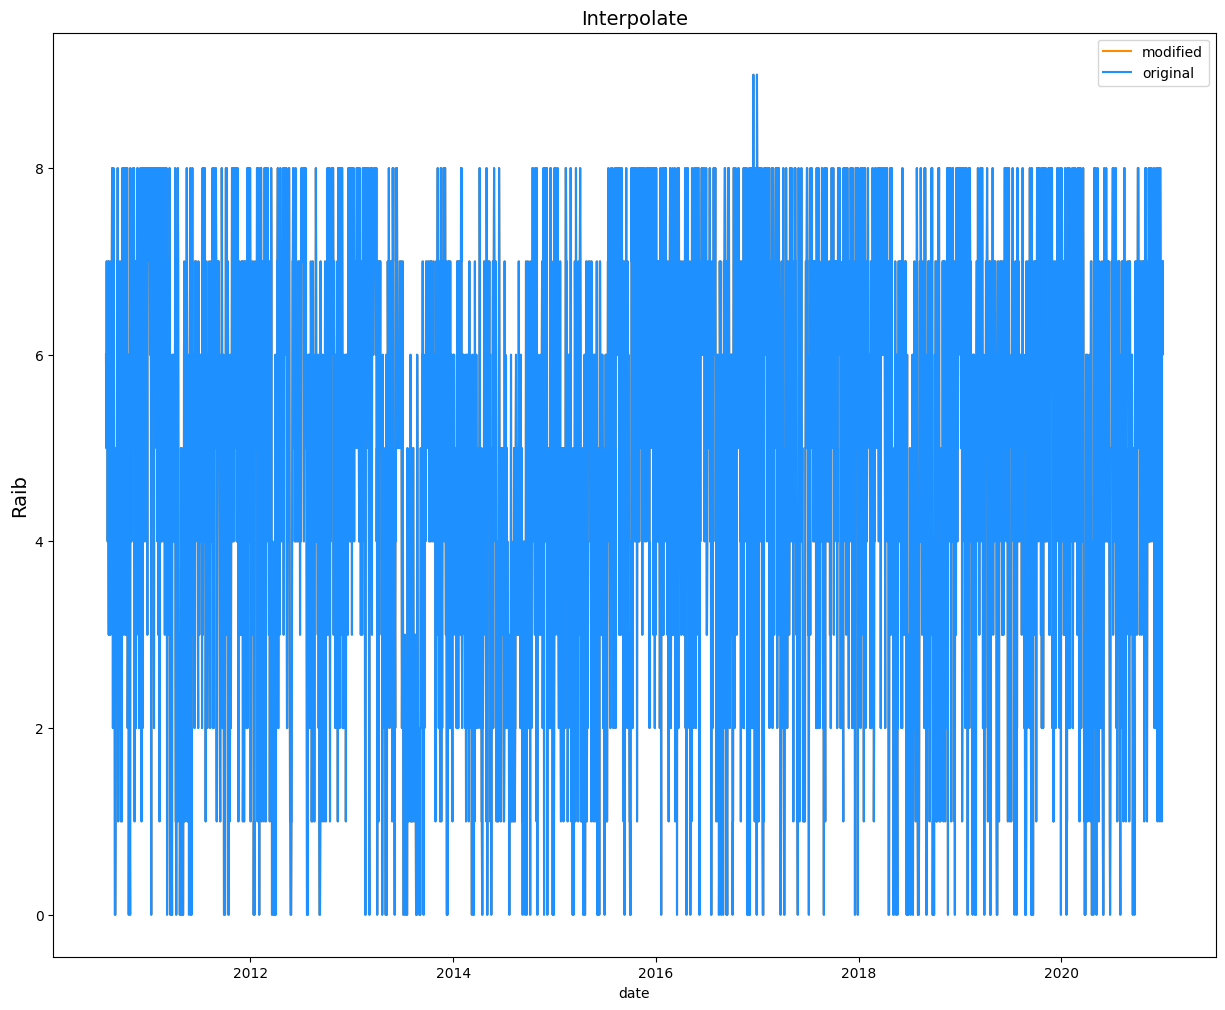

In [46]:
data = dfW
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
sns.lineplot(x=data.index, y=data.cloud_cover.interpolate(),color='darkorange', label = 'modified')
sns.lineplot(x=data.index, y=data.cloud_cover.fillna(np.inf),  color='dodgerblue', label = 'original')
ax.set_title(f'Interpolate', fontsize=14)
ax.set_ylabel(ylabel='Raib', fontsize=14)
plt.show()

In [47]:
print(dfW.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808 entries, 2010-07-30 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       3808 non-null   float64
 1   sunshine          3808 non-null   Float64
 2   global_radiation  3808 non-null   float64
 3   max_temp          3808 non-null   float64
 4   mean_temp         3808 non-null   float64
 5   min_temp          3808 non-null   float64
 6   precipitation     3808 non-null   float64
 7   pressure          3808 non-null   Int64  
 8   snow_depth        3720 non-null   float64
dtypes: Float64(1), Int64(1), float64(7)
memory usage: 434.0 KB
None


In [48]:
print(dfW[dfW.isnull().any(axis=1)])

            cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
date                                                                       
2010-07-30          6.0       3.1             157.0      25.1       17.7   
2010-07-31          5.0       4.7             184.0      23.9       21.1   
2010-08-01          7.0       0.3              89.0      23.4       19.3   
2010-08-02          7.0       2.0             134.0      23.6       19.5   
2010-08-03          5.0       3.9             169.0      20.1       17.9   
...                 ...       ...               ...       ...        ...   
2010-10-21          2.0       6.2              94.0      14.2        6.0   
2010-10-22          6.0       0.7              42.0      12.8        8.9   
2010-10-23          6.0       3.5              70.0      11.2       10.5   
2010-10-24          1.0       7.6              99.0      12.1        7.0   
2010-10-25          0.0       9.2             108.0      14.0        6.3   

           

In [49]:
print(type(dfW))

<class 'pandas.core.frame.DataFrame'>


In [50]:
dfW['prcp_amt'] = dfW['prcp_amt'].interpolate()

KeyError: 'prcp_amt'

In [ ]:
dfW_down = dfW.resample("D", on='ob_end_time').sum()

In [ ]:
print(dfW.info())
print(dfW_down.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104426 entries, 0 to 113117
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ob_end_time  104426 non-null  datetime64[ns]
 1   prcp_amt     104426 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2010-01-01 to 2021-12-31
Freq: D
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   prcp_amt  4383 non-null   float64
dtypes: float64(1)
memory usage: 68.5 KB
None
